<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1">Imports</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2">Read Data</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-3">Plots</a></span></li></ul></div>

- Author: Bruno
- Start: 16/04


## Imports

In [2]:
import zipfile
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
import seaborn as sns
sns.set()

## Read Data

In [3]:
DATA_DIR = "../main/datasets/"
DATA_FILE = "1.0v.zip"
with zipfile.ZipFile(DATA_DIR+DATA_FILE) as z:
    # I am saving the data again to use in my auto eda script;
    # Too lazy to change it :)
    dfs = []
    for name in ["infos", "items", "orders"]:
        dfs.append(pd.read_csv(z.open(f"1.0v/{name}.csv"), sep="|"))
    infos, items, orders = dfs

In [4]:
orders.head(2)

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19


In [5]:
orders.isna().sum()

time          0
transactID    0
itemID        0
order         0
salesPrice    0
dtype: int64

In [6]:
orders["time"] = pd.to_datetime(orders["time"])

In [7]:
print("The first timestamp is", orders["time"].min(),
      "and the last is", orders["time"].max())

The first timestamp is 2018-01-01 00:01:56 and the last is 2018-06-29 23:57:01


In [9]:
orders["days"] = orders["time"].dt.dayofyear

# Make sure we have data for every single day
assert (orders["days"].unique() != np.arange(1, 181)).sum() == 0

## Plots

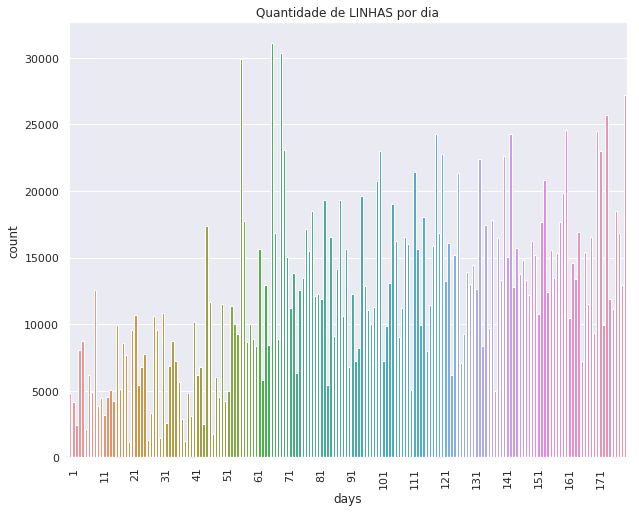

In [62]:
ticks = np.arange(1, 181, 10)
sns.countplot(orders["days"])
plt.xticks(ticks, ticks, rotation=90)
plt.title("Quantidade de LINHAS por dia");

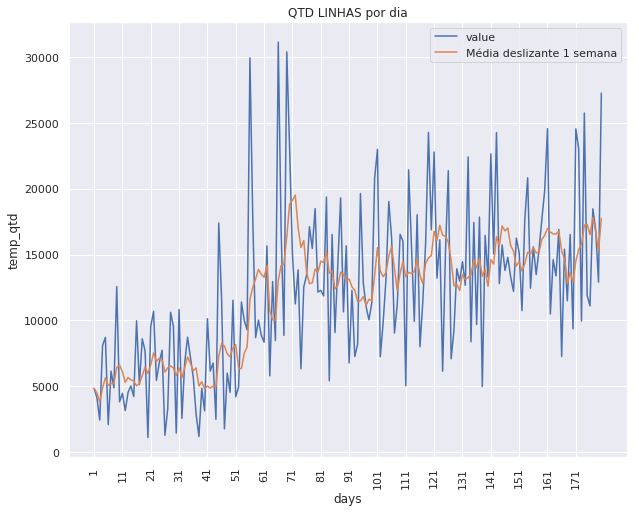

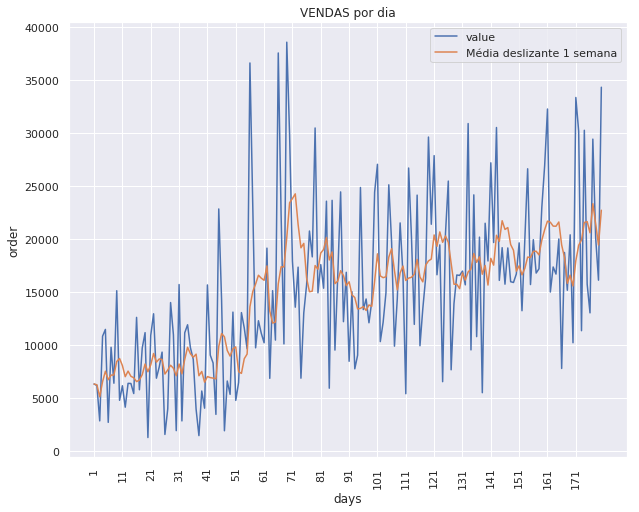

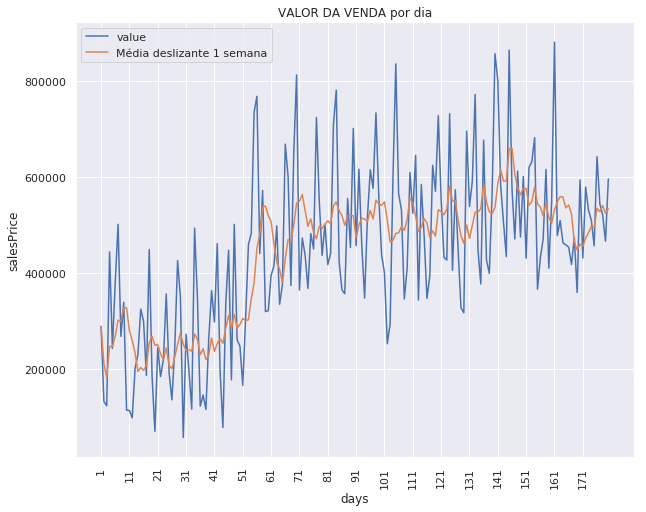

In [10]:
orders["temp_qtd"] = 1

for name, col in zip(["QTD LINHAS", "VENDAS", "VALOR DA VENDA"], 
                     ["temp_qtd", "order", "salesPrice"]):
    temp = orders.groupby("days")[col].sum()
    week_mean = temp.rolling(7, min_periods=1).mean()
    
    sns.lineplot(y=temp.values, x=temp.index, label="value")
    sns.lineplot(y=week_mean, x=week_mean.index, label="Média deslizante 1 semana")
    ticks = np.arange(1, 181, 10)
    plt.xticks(ticks, ticks, rotation=90)
    plt.title(f"{name} por dia")
    plt.show()

Very interesting! Something happened after day 50 and they started selling more...

OBS: In general, "order" = 1, but not always, that's why the first 2 plots are similar

In [12]:
(orders["order"] != 1).sum() / len(orders)

0.1791095600046747